<a href="https://colab.research.google.com/github/pmj-chosim/Commit-Project-2023.1.20-2023.2.28-/blob/main/%5B2023.01.23%5D%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C%20%EB%8B%A4%ED%95%AD%20%ED%9A%8C%EA%B7%80(2%EC%B0%A8)%20-%20knn%ED%95%9C%EA%B3%84%20%EA%B7%B9%EB%B3%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. knn 한계**

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)
# 훈련 세트와 테스트 세트를 2차원 배열로 
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
print(knr.predict([[50]]))

[1033.33333333]


나와야 하는 1500이랑 차이가 많이 남

**2. knn-회귀의 한계**

In [8]:
import matplotlib.pyplot as plt

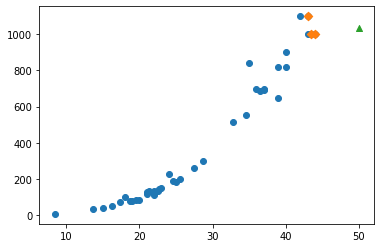

In [9]:
# 50cm 농어의 이웃
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [10]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [11]:
print(knr.predict([[100]]))

[1033.33333333]


둘 다 1500이랑 차이가 많구만.. 
여기서 다시 한 번 상기 

-knn은 검사해야 하는 값의 이웃값들이 어느 집합에 가장 많이 있는지 파악해서 검사값의 집합 알려줌.(이웃이 3이면 3개의 이웃, 5개면 5개의 이웃이 어느 집합에 많이 있는지 비교해서)
-knn 회귀는 주변 이웃값의 평균 knn이랑 같이 설정한 이웃 개수에 따라 평균을 구해서



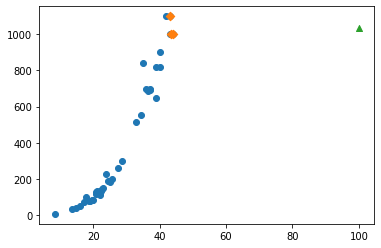

In [12]:
# 100cm 농어의 이웃
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

1500이랑 knn, knn회귀 둘 다 차이가 많이 나니 다른 방법을 찾아보자~ > 선형 회귀

**3. 선형 회귀**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [15]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1186.32745376]


아까 1033~뭐시기 나온 knn들보단 낫고만

In [18]:
print(lr.coef_, lr.intercept_) #coef는 기울기 inter~는 절편

[35.75293879] -601.3194857139649


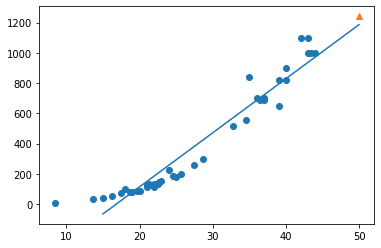

In [17]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [19]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9283354556752759
0.8655126911846174


**4. 다항 회귀**

In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

이차곡선으로 추세곡선

In [21]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [22]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1517.63316028]


정말 비슷하군!!

In [23]:
print(lr.coef_, lr.intercept_)

[  0.93458611 -18.1101159 ] 86.67367620992604


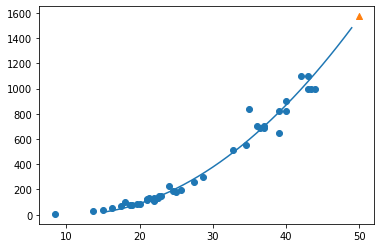

In [24]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열
point = np.arange(15, 50)
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

In [25]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9745361404115951
0.9603954002523423
